# Travel Insurance Prediction

This project aims to build a predictive model to determine whether a customer is likely to purchase travel insurance based on their demographic and behavioral data. This is a supervised machine learning classification problem using Python, scikit-learn, and visualizations with matplotlib and seaborn.


## Step 1: Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


## Step 2: Load and Explore the Dataset

In [6]:
df = pd.read_csv(r"C:\Users\braid\Downloads\travel insurance.csv")


In [7]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [9]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [10]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [11]:
df.duplicated().sum()

8042

In [12]:
df = df.drop_duplicates()

In [13]:
#Drop the Gender column 

df.drop(columns=['Gender'], inplace=True)
df.drop(columns=['Destination'], inplace=True)

In [14]:
# Checking unique values for categorical exploration
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Agency: ['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'JWT' 'RAB' 'SSI' 'ART' 'CSR' 'CCR'
 'ADM' 'LWC' 'TTW' 'TST']
Agency Type: ['Travel Agency' 'Airlines']
Distribution Channel: ['Offline' 'Online']
Product Name: ['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']
Claim: ['No' 'Yes']
Duration: [ 186   65   60   79   66   47   63   57   33    1   53    5   39    6
   48   11    3   14  136   12    7  190  364 

In [15]:
#Feature Engineering

df['Profit'] = df['Net Sales'] - df['Commision (in value)']
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Teen', 'Young Adult', 'Adult', 'Mid-Age', 'Senior'])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

In [16]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Profit,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Mid-Age,AgeGroup_Senior
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,-29.0,9.57,81,-38.57,False,False,False,True
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,-29.0,9.57,71,-38.57,False,False,False,True
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,-49.5,29.70,32,-79.20,False,True,False,False
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,-39.6,23.76,32,-63.36,False,True,False,False
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,-19.8,11.88,41,-31.68,False,True,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 0 to 63325
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Agency Type           55284 non-null  object 
 2   Distribution Channel  55284 non-null  object 
 3   Product Name          55284 non-null  object 
 4   Claim                 55284 non-null  object 
 5   Duration              55284 non-null  int64  
 6   Net Sales             55284 non-null  float64
 7   Commision (in value)  55284 non-null  float64
 8   Age                   55284 non-null  int64  
 9   Profit                55284 non-null  float64
 10  AgeGroup_Young Adult  55284 non-null  bool   
 11  AgeGroup_Adult        55284 non-null  bool   
 12  AgeGroup_Mid-Age      55284 non-null  bool   
 13  AgeGroup_Senior       55284 non-null  bool   
dtypes: bool(4), float64(3), int64(2), object(5)
memory usage: 4.9+ MB


## Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


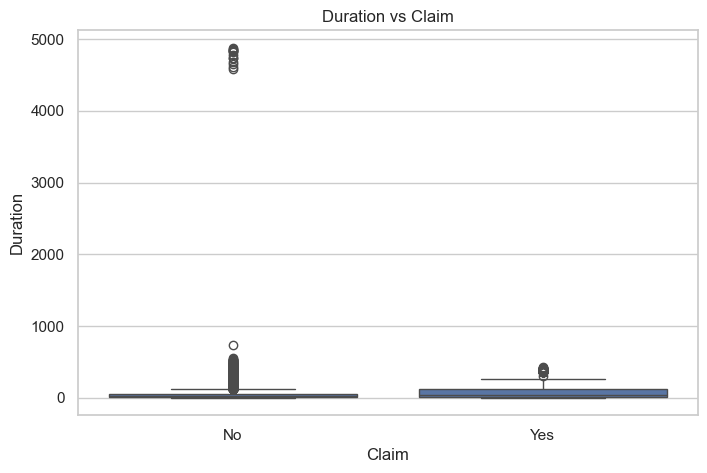

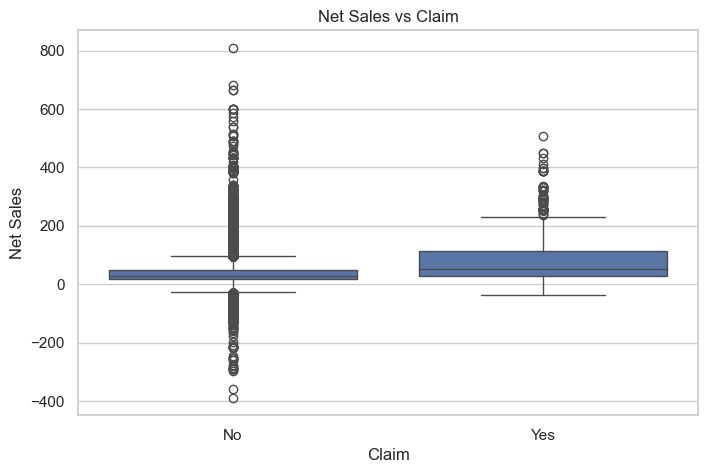

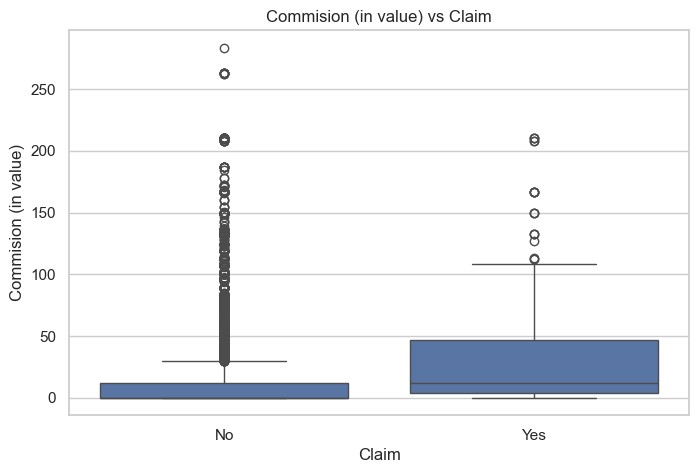

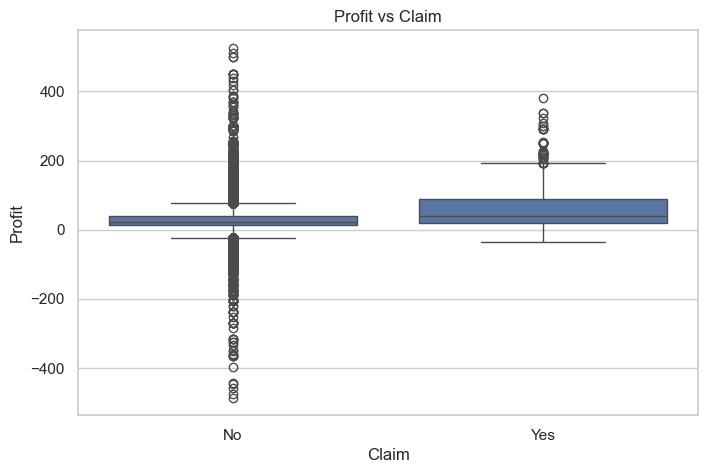

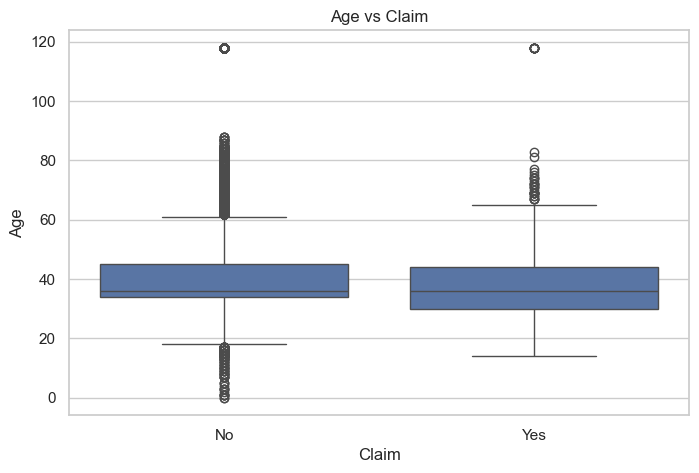

In [20]:
# List of numeric features you want to visualize
numeric_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Profit', 'Age']

# Create boxplots
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Claim', y=feature, data=df)  # Replace 'df' with your DataFrame name if different
    plt.title(f'{feature} vs Claim')
    plt.show()


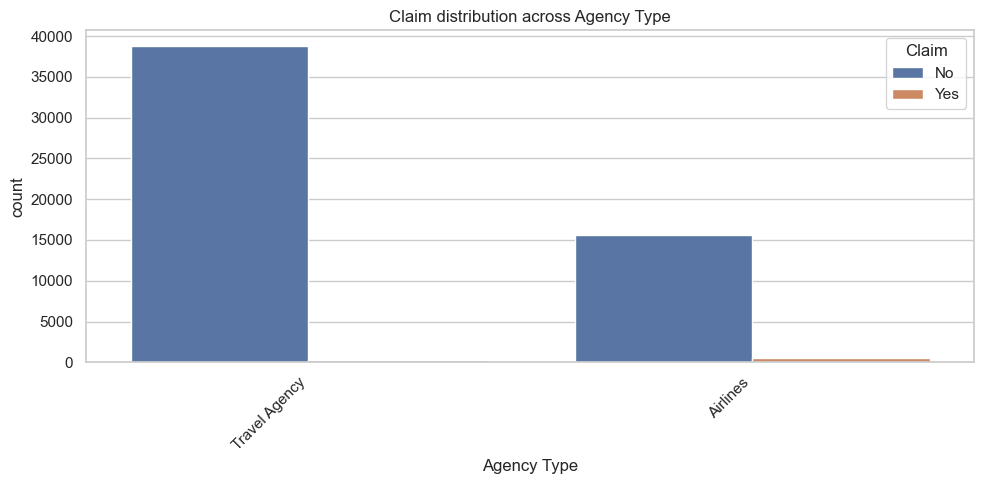

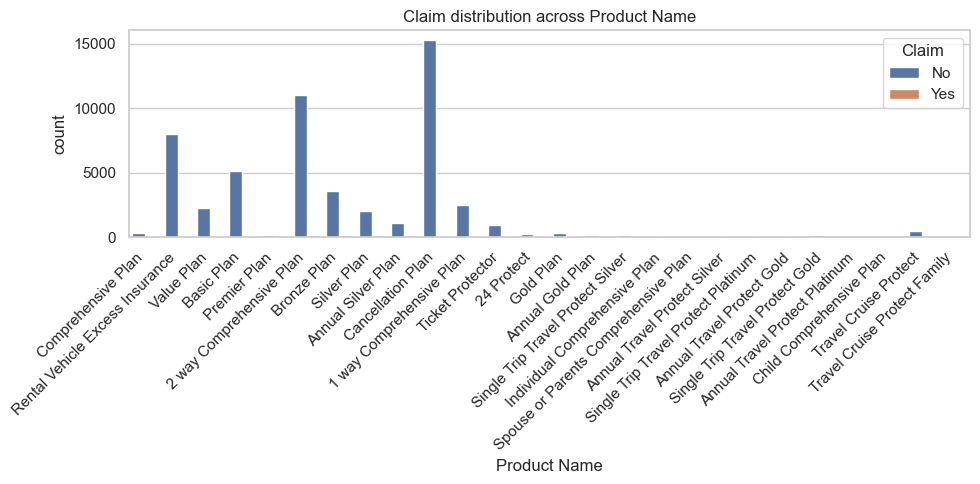

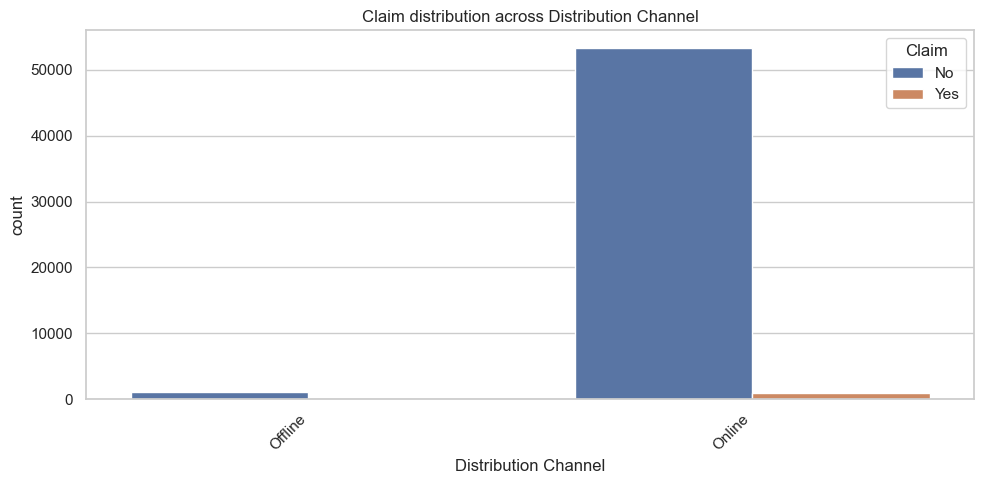

In [21]:
# List of categorical features you want to visualize
categorical_features = ['Agency Type', 'Product Name', 'Distribution Channel']

# Create countplots
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Claim', data=df)
    plt.title(f'Claim distribution across {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Claim')
    plt.tight_layout()
    plt.show()


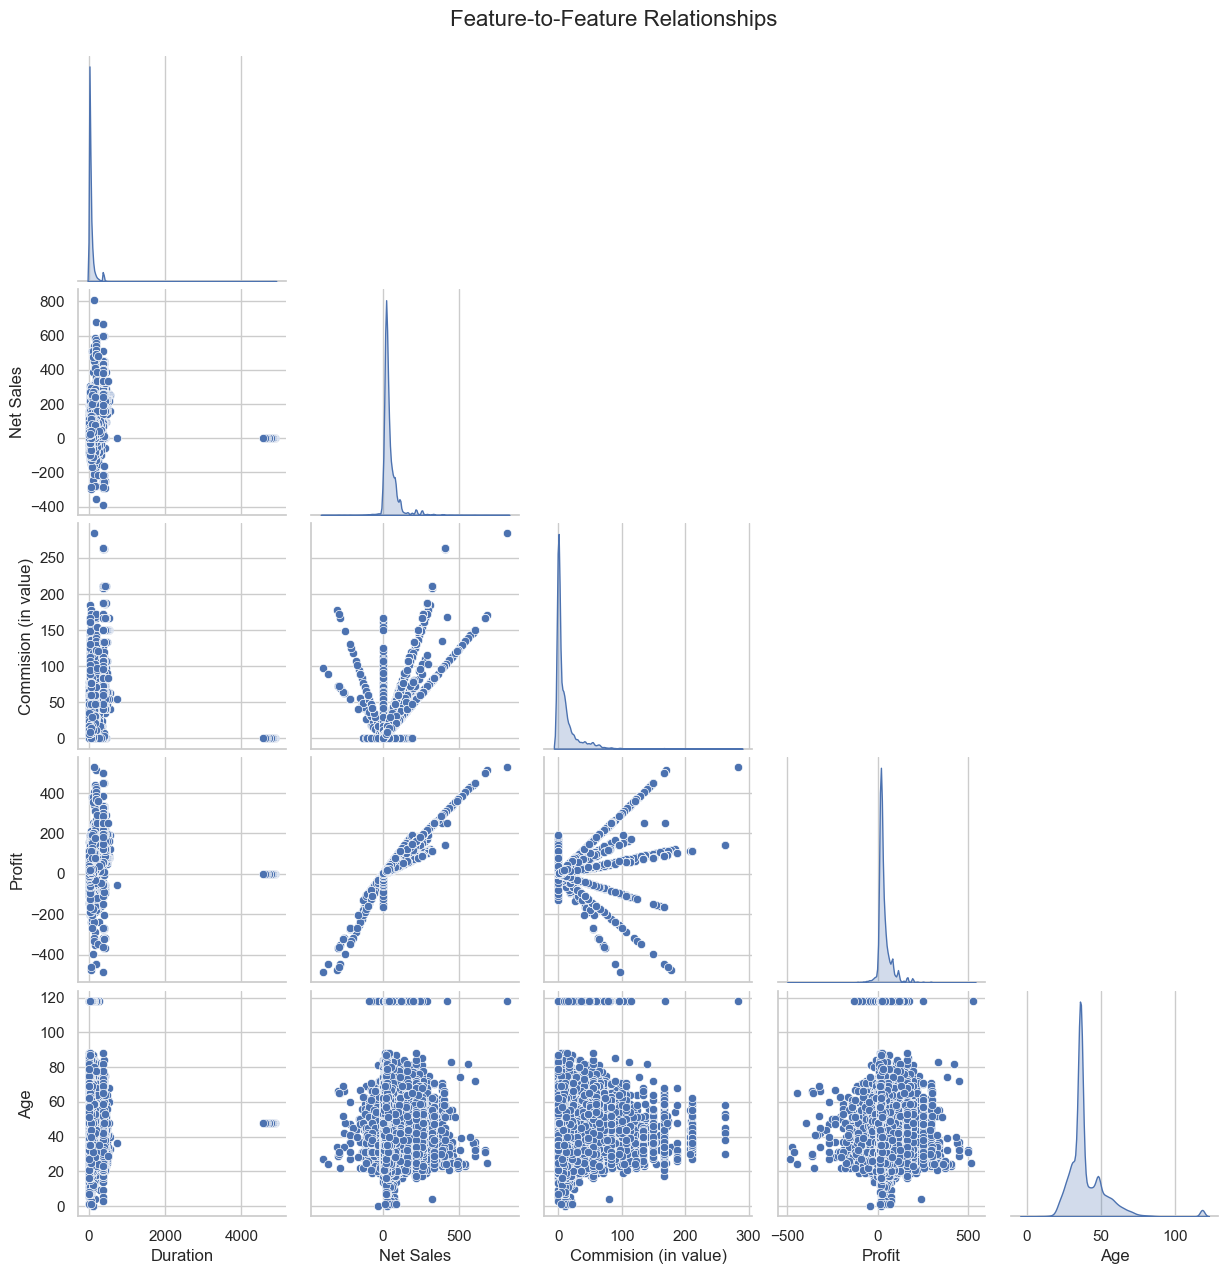

In [22]:
# Pairplot for Feature-to-Feature Visualization
features = ['Duration', 'Net Sales', 'Commision (in value)', 'Profit', 'Age']

sns.pairplot(df[features], diag_kind='kde', corner=True)
plt.suptitle("Feature-to-Feature Relationships", y=1.02, fontsize=16)
plt.show()


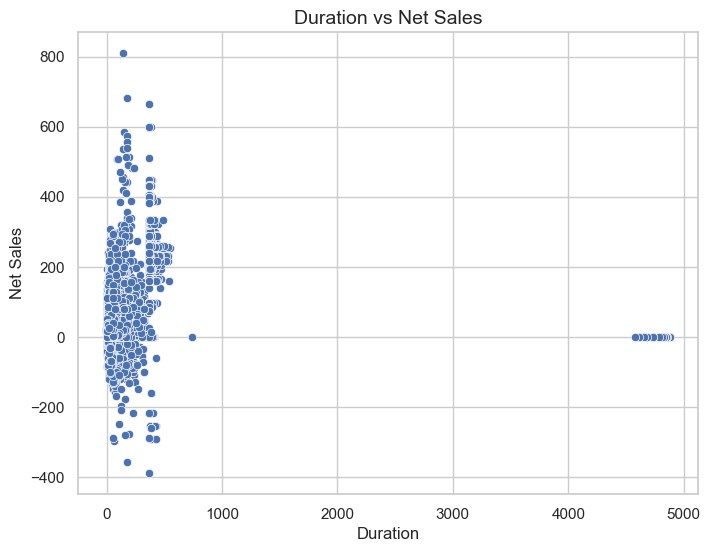

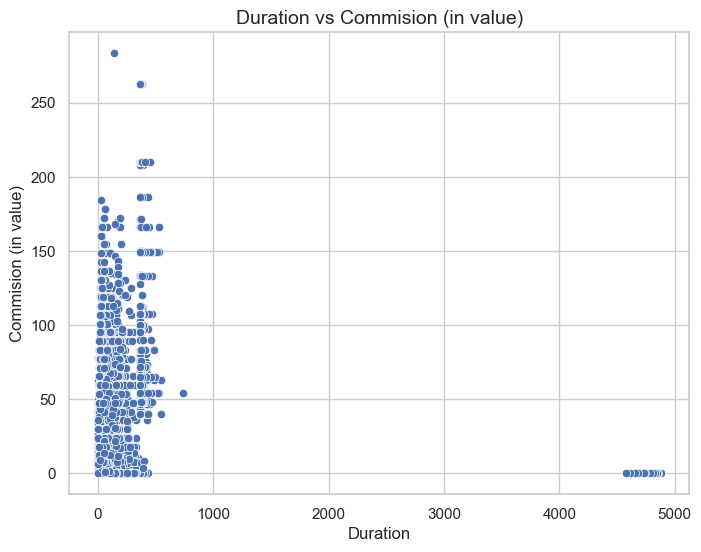

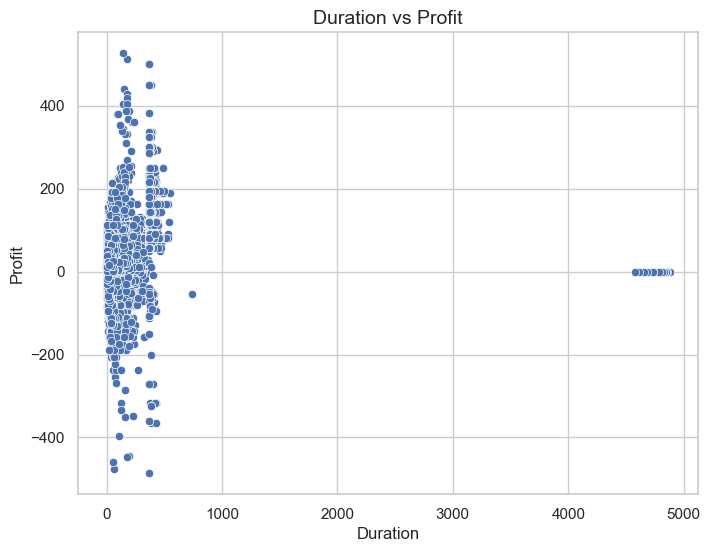

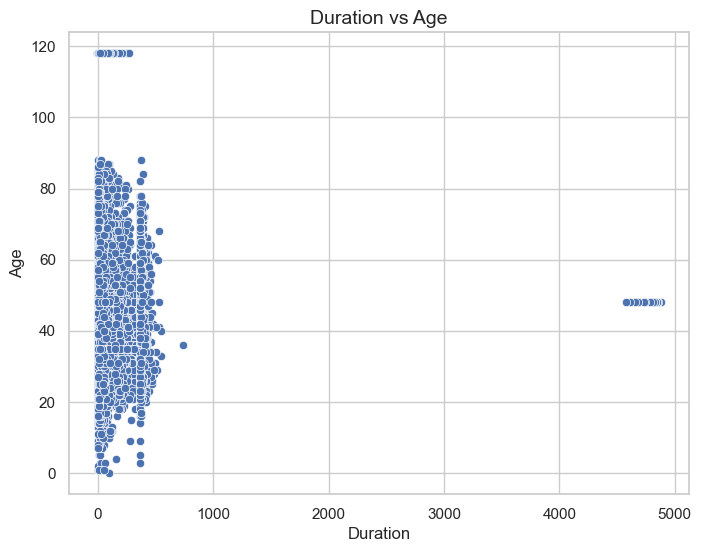

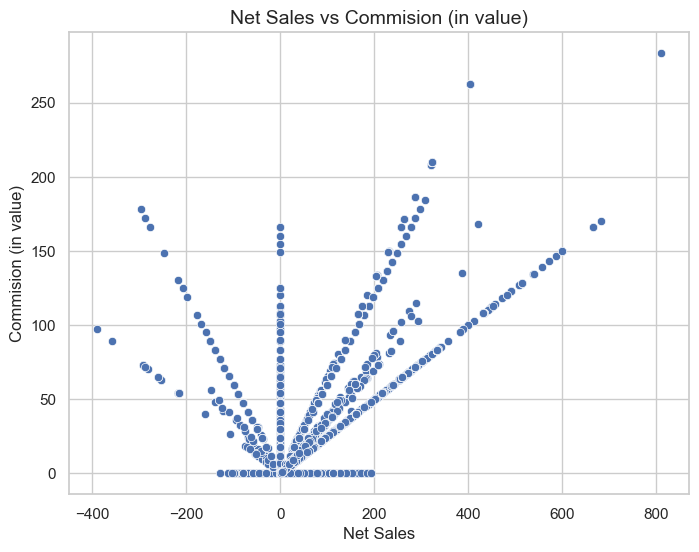

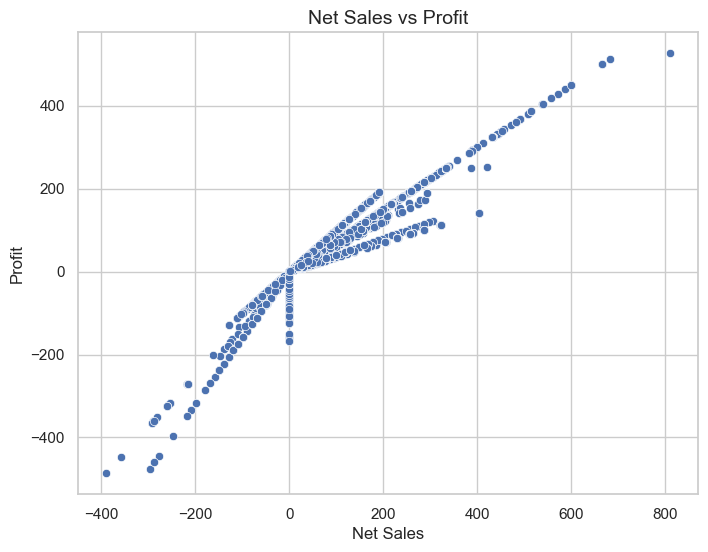

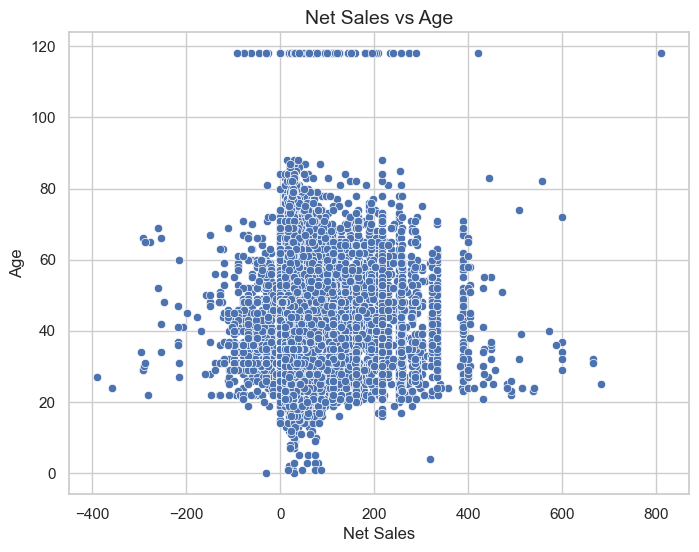

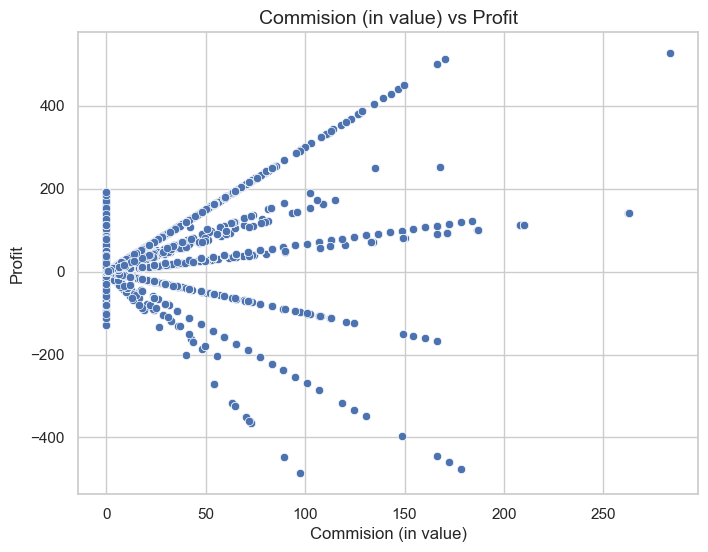

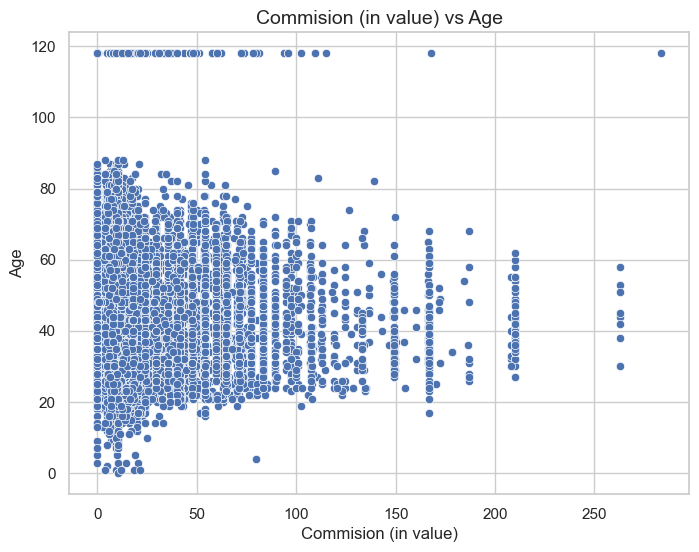

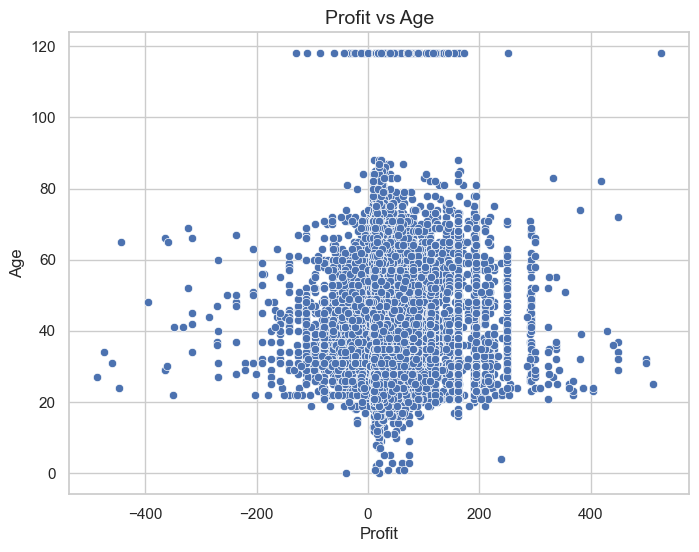

In [23]:
# List of features to compare
features = ['Duration', 'Net Sales', 'Commision (in value)', 'Profit', 'Age']

# Loop through feature pairs
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=features[i], y=features[j])
        plt.title(f'{features[i]} vs {features[j]}', fontsize=14)
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.grid(True)
        plt.show()


In [24]:
#Binary Variables (e.g., Claim, Gender)

df['Claim'] = df['Claim'].map({'No': 0, 'Yes': 1})
df['Distribution Channel'] = df['Distribution Channel'].map({'Offline': 0, 'Online': 1})
df['Agency Type'] = df['Agency Type'].map({'Travel Agency': 0, 'Airlines': 1})


## Correlation Analysis

We use a heatmap to identify the correlation between numeric features.

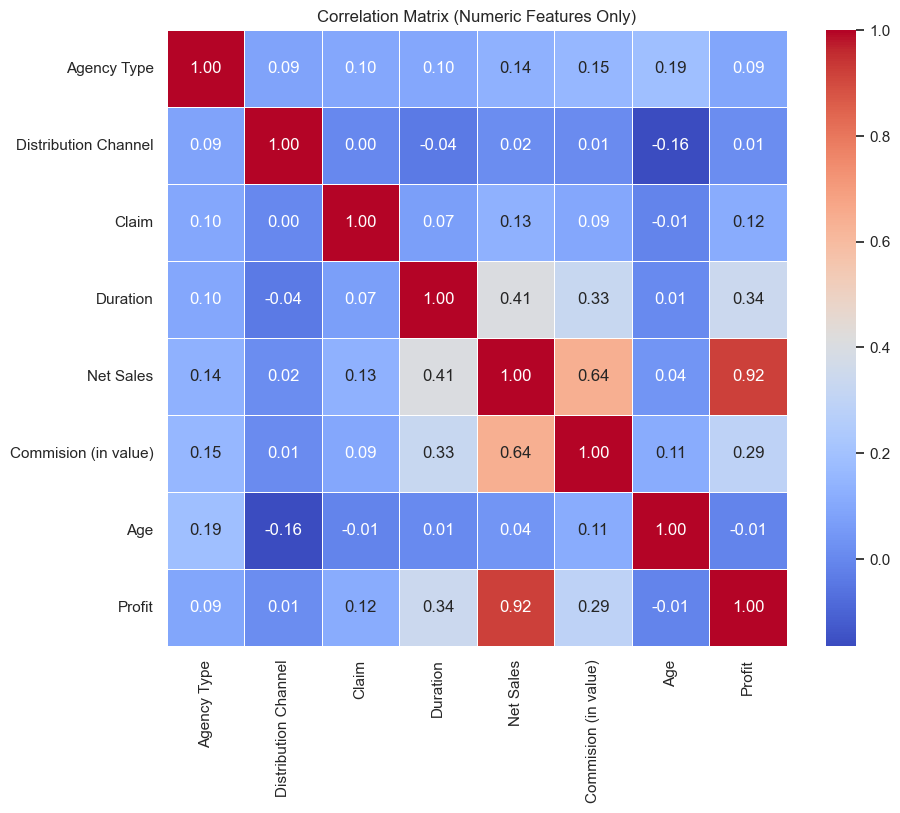

In [26]:
# Step 1: Identify columns that are numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Step 2: Extract only numeric data
df_numeric = df[numeric_cols]

# Step 3: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

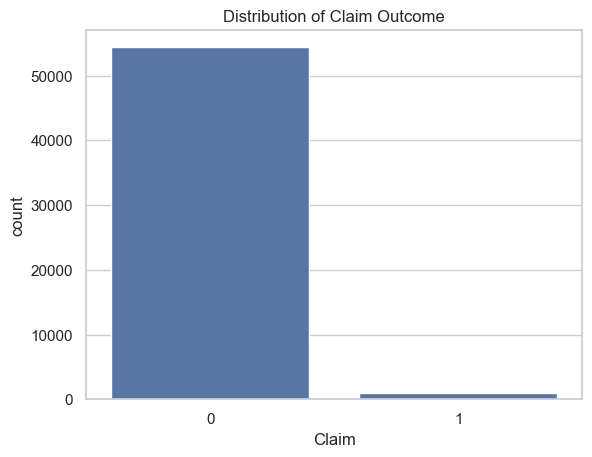

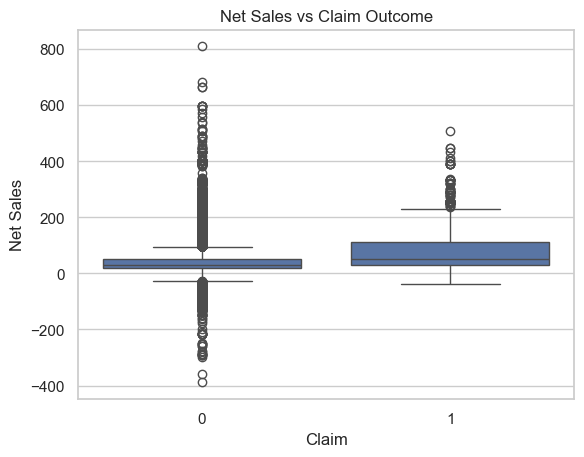

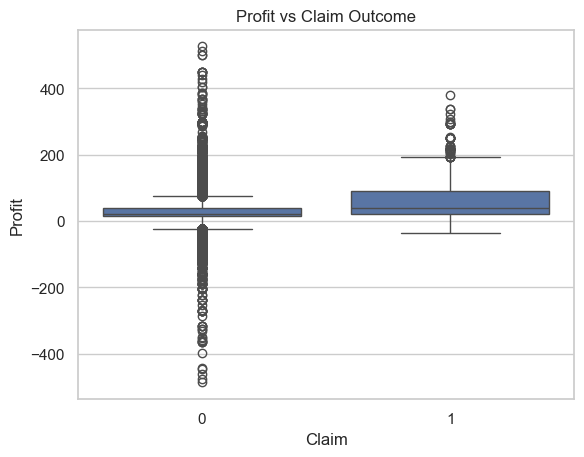

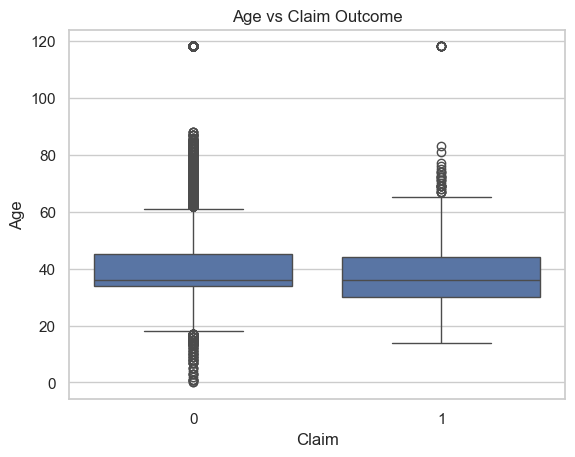

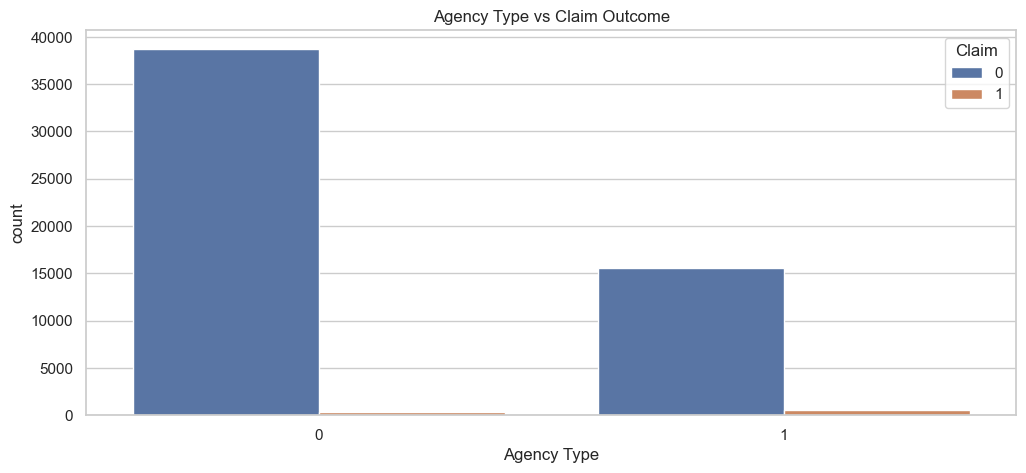

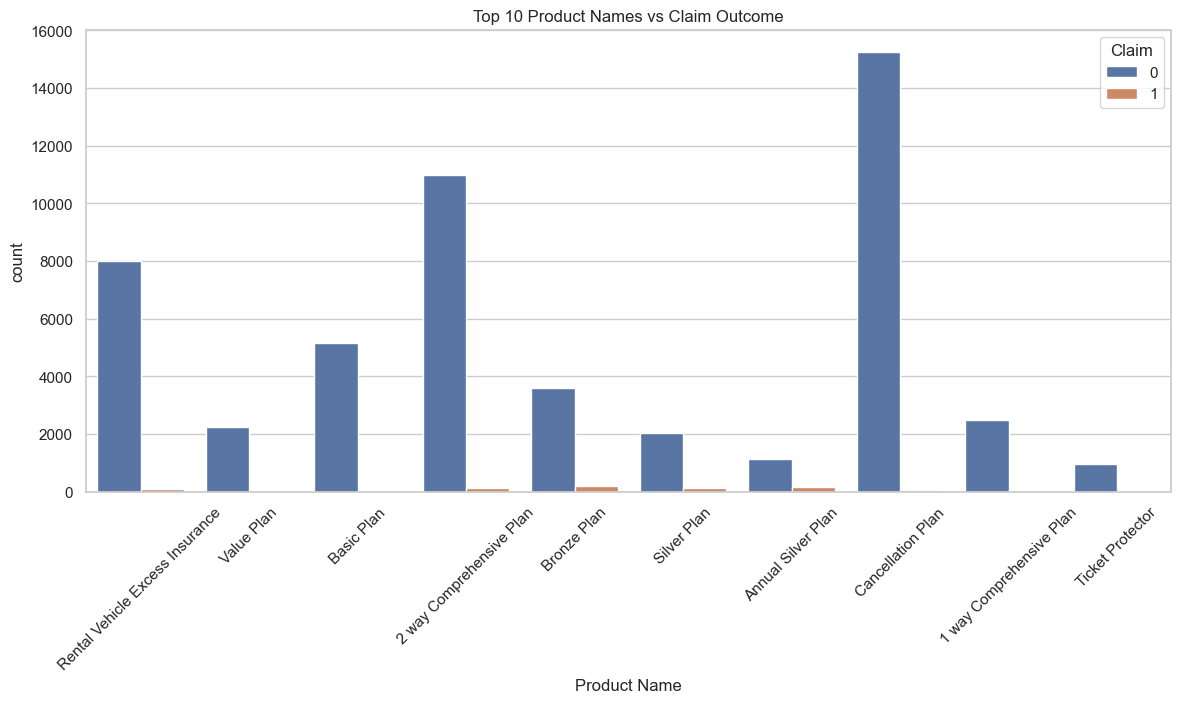

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(data=df, x='Claim')
plt.title("Distribution of Claim Outcome")
plt.show()

# Net Sales vs Claim
sns.boxplot(data=df, x='Claim', y='Net Sales')
plt.title("Net Sales vs Claim Outcome")
plt.show()

# Profit vs Claim
sns.boxplot(data=df, x='Claim', y='Profit')
plt.title("Profit vs Claim Outcome")
plt.show()

# Age vs Claim
sns.boxplot(data=df, x='Claim', y='Age')
plt.title("Age vs Claim Outcome")
plt.show()

# Agency Type vs Claim
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Agency Type', hue='Claim')
plt.title("Agency Type vs Claim Outcome")
plt.show()

# Product Name vs Claim (top 10 products)
top_products = df['Product Name'].value_counts().nlargest(10).index
df_top = df[df['Product Name'].isin(top_products)]

plt.figure(figsize=(14, 6))
sns.countplot(data=df_top, x='Product Name', hue='Claim')
plt.title("Top 10 Product Names vs Claim Outcome")
plt.xticks(rotation=45)
plt.show()


## Data Preprocessing

In [29]:
df['AgeGroup_Young Adult'] = df['AgeGroup_Young Adult'].astype(int)
df['AgeGroup_Adult'] = df['AgeGroup_Adult'].astype(int)
df['AgeGroup_Mid-Age'] = df['AgeGroup_Mid-Age'].astype(int)
df['AgeGroup_Senior'] = df['AgeGroup_Senior'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 0 to 63325
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Agency Type           55284 non-null  int64  
 2   Distribution Channel  55284 non-null  int64  
 3   Product Name          55284 non-null  object 
 4   Claim                 55284 non-null  int64  
 5   Duration              55284 non-null  int64  
 6   Net Sales             55284 non-null  float64
 7   Commision (in value)  55284 non-null  float64
 8   Age                   55284 non-null  int64  
 9   Profit                55284 non-null  float64
 10  AgeGroup_Young Adult  55284 non-null  int32  
 11  AgeGroup_Adult        55284 non-null  int32  
 12  AgeGroup_Mid-Age      55284 non-null  int32  
 13  AgeGroup_Senior       55284 non-null  int32  
dtypes: float64(3), int32(4), int64(5), object(2)
memory usage: 5.5+ MB


In [31]:
#Categorical Variables (Nominal)
#One-Hot Encoding (Most common, especially for tree models)

#df = pd.get_dummies(df, columns=['Agency'], drop_first=True)


In [32]:
# Convert all boolean columns to int (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [33]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('int32')],
      dtype=object)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Net Sales', 'Commision (in value)', 'Age', 'Profit', 'Duration']] = scaler.fit_transform(df[['Net Sales', 'Commision (in value)', 'Age', 'Profit', 'Duration']])


In [35]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Profit,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Mid-Age,AgeGroup_Senior
0,CBH,0,0,Comprehensive Plan,0,1.252529,-1.423021,-0.053718,3.036647,-1.750128,0,0,0,1
1,CBH,0,0,Comprehensive Plan,0,1.252529,-1.423021,-0.053718,2.296400,-1.750128,0,0,0,1
2,CWT,0,1,Rental Vehicle Excess Insurance,0,0.115446,-1.829379,0.919850,-0.590564,-2.756208,0,1,0,0
3,CWT,0,1,Rental Vehicle Excess Insurance,0,0.068460,-1.633138,0.632567,-0.590564,-2.363978,0,1,0,0
4,CWT,0,1,Rental Vehicle Excess Insurance,0,0.247010,-1.240655,0.058003,0.075658,-1.579518,0,1,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 0 to 63325
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Agency Type           55284 non-null  int64  
 2   Distribution Channel  55284 non-null  int64  
 3   Product Name          55284 non-null  object 
 4   Claim                 55284 non-null  int64  
 5   Duration              55284 non-null  float64
 6   Net Sales             55284 non-null  float64
 7   Commision (in value)  55284 non-null  float64
 8   Age                   55284 non-null  float64
 9   Profit                55284 non-null  float64
 10  AgeGroup_Young Adult  55284 non-null  int32  
 11  AgeGroup_Adult        55284 non-null  int32  
 12  AgeGroup_Mid-Age      55284 non-null  int32  
 13  AgeGroup_Senior       55284 non-null  int32  
dtypes: float64(5), int32(4), int64(3), object(2)
memory usage: 5.5+ MB


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Employment Type'] = le.fit_transform(df['Employment Type'])


## Feature and Target Split

In [40]:
pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 1.0/102.4 MB 2.1 MB/s eta 0:00:49
    --------------------------------------- 1.6/102.4 MB 2.0 MB/s eta 0:00:51
    --------------------------------------- 1.8/102.4 MB 1.9 MB/s eta 0:00:53
    --------------------------------------- 2.1/102.4 MB 1.8 MB/s eta 0:00:56
    --------------------------------------- 2.4/102.4 MB 1.8 MB/s eta 0:00:56
   - -------------------------------------- 2.9/102.4 MB 1.8 MB/s eta 0:00:56
   - -------------------------------------- 2.9/102.4 MB 1.8 MB/s eta 0:00:56
   - -------------------------------------- 3.4/102.4 MB 1.7 MB/s eta 0:00:58
   - -------------------------------------- 3.7/102.4 MB 1.7 MB/s eta 0:00:58
   - --

In [45]:
from catboost import CatBoostClassifier

# Define features
X = df.drop('Claim', axis=1)
y = df['Claim']

# List of categorical columns
cat_features = ['Agency', 'Product Name']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost on raw data
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train, cat_features=cat_features)


In [47]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy of CatBoost model: {accuracy:.2%}")


Accuracy of CatBoost model: 98.58%


In [51]:
X = df.drop(['Claim', 'Product Name', 'Agency'], axis=1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
X

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Profit,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Mid-Age,AgeGroup_Senior
0,0,0,1.252529,-1.423021,-0.053718,3.036647,-1.750128,0,0,0,1
1,0,0,1.252529,-1.423021,-0.053718,2.296400,-1.750128,0,0,0,1
2,0,1,0.115446,-1.829379,0.919850,-0.590564,-2.756208,0,1,0,0
3,0,1,0.068460,-1.633138,0.632567,-0.590564,-2.363978,0,1,0,0
4,0,1,0.247010,-1.240655,0.058003,0.075658,-1.579518,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
63320,1,1,-0.448396,-0.491371,-0.211869,-0.960688,-0.505343,1,0,0,0
63321,1,1,0.547726,-0.154391,0.075897,-0.664589,-0.231723,0,1,0,0
63322,1,1,0.049665,-0.055279,0.160534,0.001634,-0.151246,0,1,0,0
63323,1,1,-0.476588,-0.491371,-0.211869,1.260054,-0.505343,0,0,1,0


In [55]:
print(X_train.columns)

Index(['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Profit', 'AgeGroup_Young Adult',
       'AgeGroup_Adult', 'AgeGroup_Mid-Age', 'AgeGroup_Senior'],
      dtype='object')


## Logistic Regression

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred_log) * 100
print(f"Logistic Regression Accuracy: {accuracy:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 98.56%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10901
           1       0.00      0.00      0.00       156

    accuracy                           0.99     11057
   macro avg       0.49      0.50      0.50     11057
weighted avg       0.97      0.99      0.98     11057



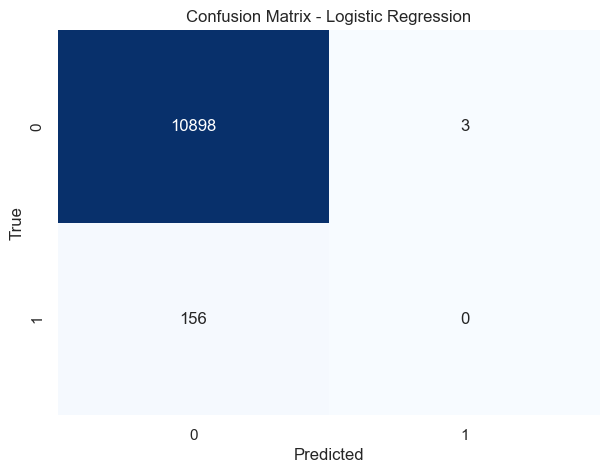

In [64]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Decision Tree

In [67]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Accuracy: {accuracy:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 97.22%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10901
           1       0.05      0.05      0.05       156

    accuracy                           0.97     11057
   macro avg       0.52      0.52      0.52     11057
weighted avg       0.97      0.97      0.97     11057



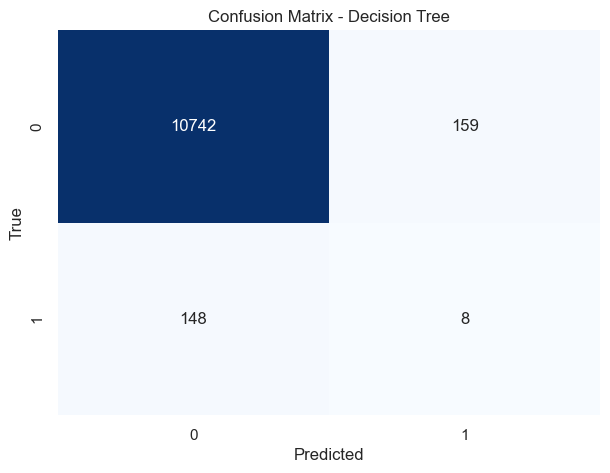

In [71]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Random Forest

In [73]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {accuracy:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 98.12%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10901
           1       0.04      0.01      0.02       156

    accuracy                           0.98     11057
   macro avg       0.51      0.50      0.50     11057
weighted avg       0.97      0.98      0.98     11057



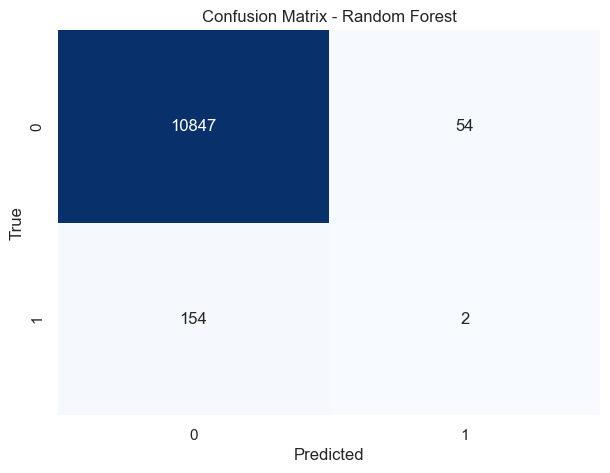

In [77]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Gradient Boosting

In [82]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred_gb) * 100
print(f"Gradient Boosting Accuracy: {accuracy:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 98.56%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10901
           1       0.00      0.00      0.00       156

    accuracy                           0.99     11057
   macro avg       0.49      0.50      0.50     11057
weighted avg       0.97      0.99      0.98     11057



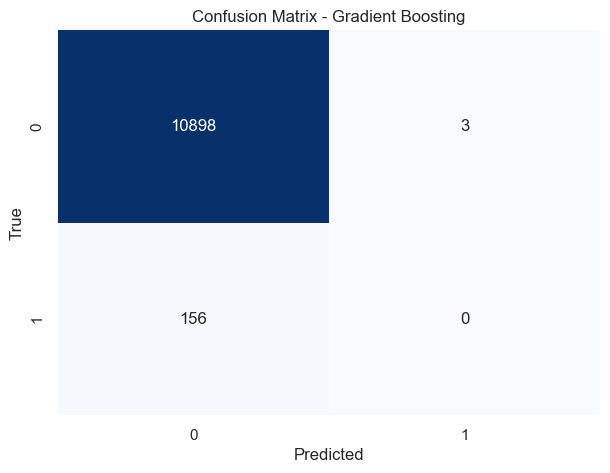

In [84]:
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Model Comparison

In [88]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "CatBoost model": accuracy_score(y_test, y_pred)
}
pd.DataFrame(model_scores.items(), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
4,CatBoost model,0.985801
0,Logistic Regression,0.985620
3,Gradient Boosting,0.985620
2,Random Forest,0.981188
1,Decision Tree,0.972235


## Feature Importance

Analyzing feature importance from tree-based models to understand key drivers of predictions.

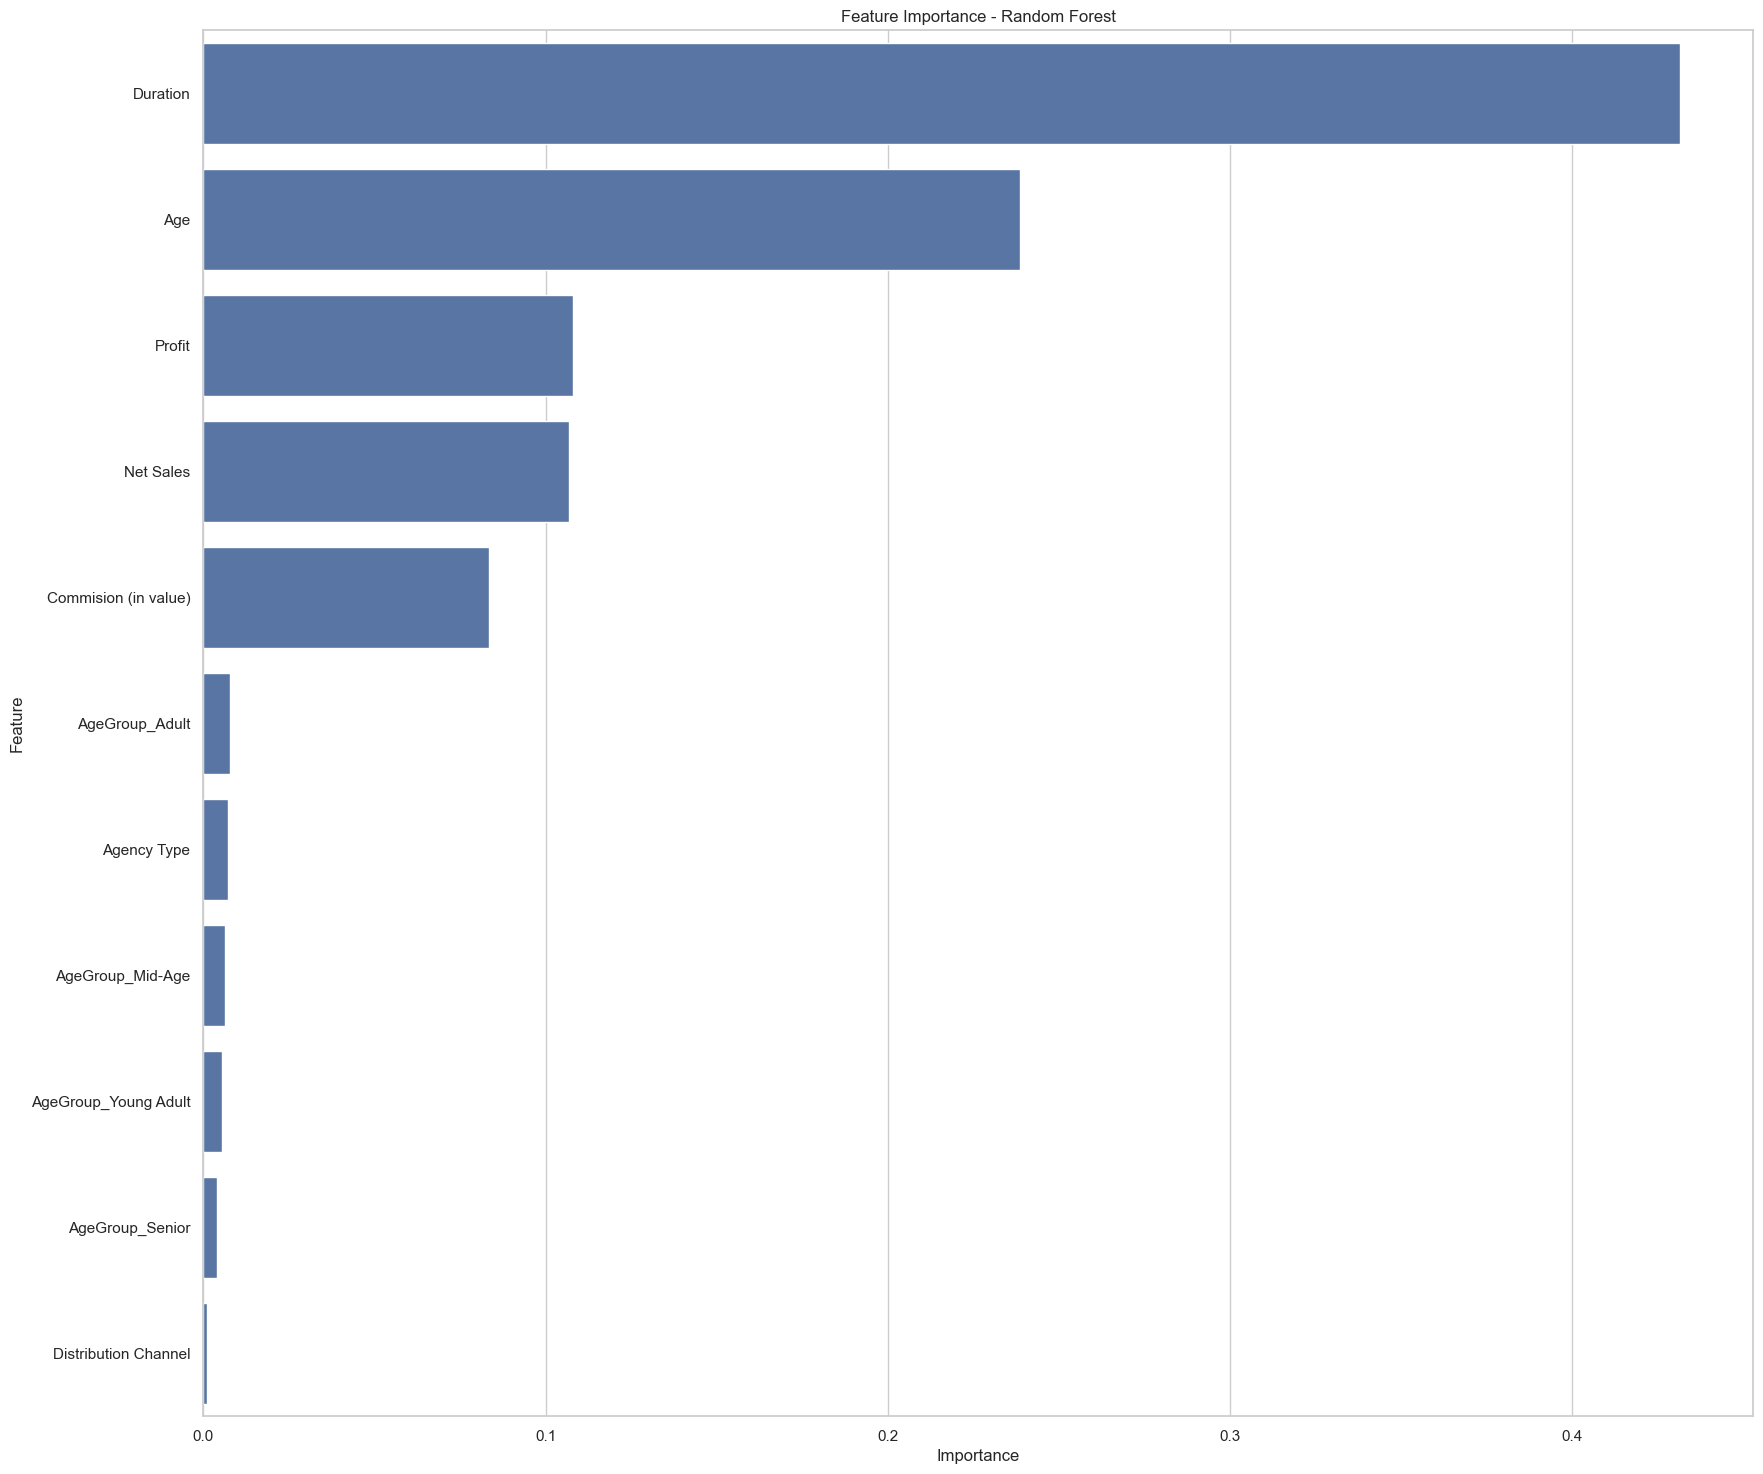

In [92]:
feat_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rforest.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 18))
sns.barplot(x='Importance', y='Feature', data=feat_importance_rf)
plt.title('Feature Importance - Random Forest')
plt.show()




In [94]:
import joblib

In [96]:
# Save the model
joblib.dump(model, 'insurance_predict_model.pkl')

['insurance_predict_model.pkl']

In [99]:
#joblib.dump(scaler, 'scaler.pkl')

In [101]:
#joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')

In [103]:
#scaler_cols = ['Net Sales', 'Commision (in value)', 'Profit', 'Age', 'Duration']
#joblib.dump(scaler_cols, 'scaler_columns.pkl')


## Conclusion

The CatBoost model performed best on this dataset. The most important features influencing travel insurance purchase include age, frequent flyer status, and annual income. Further improvements can include hyperparameter tuning and exploring additional features.
